Ajouter étude du temps de réaction

In [1]:
import math, random

In [2]:
logfileDirectory = "Experience Fiabilité\\LogFile\\"
subjectName = "Antoine29_10"
fileNameExtension = "ReponseStimuli.txt"
logfileName = logfileDirectory+subjectName+fileNameExtension
logfileName

'Experience Fiabilité\\LogFile\\Antoine29_10ReponseStimuli.txt'

In [3]:
def webfrac(x=1,nb=5, k = 0.9):
    """
    Trouve une valeur Z tel que la weberFraction(x,y)=weberFraction(y,z)
    Valeur de référence : a distance de 15, il faut au moins une seconde distance de 18 pour differencier
    """
    
    
    res = [x]
    for i in range(nb-1):
        res.append(round(res[-1]*k+res[-1]))
    return res

In [4]:
dists = webfrac(5,5,k=0.7)
dists

[5, 8, 14, 24, 41]

In [5]:
logs= True

In [6]:
def convertDistanceAngleEnPosition(angle,distance, ecartDistance = 5, logs = False, dist = []):
    if(logs):
        r = dist[distance]
    else:
        r = distance*ecartDistance
    #Shift pour lisibilité : Pour la simulation 0° est devant 90° est a gauche
    angle = angle-90
    posX = r*math.cos(math.radians(angle))
    posY = r*math.sin(math.radians(angle))
    return (round(posX),round(posY))


In [7]:
def calculPositionDisponiblesmods(nombreAngle = 7,nombreDistance=4, espaceDistance = 5, logs = False, dist = []):
    """Détermine l'ensemble des positions disponibles en fonctions du nombre d'angles et de cercles de positionnement accessible"""
    position = []
    deltaAngle = 180 / (nombreAngle - 1)
    if(logs):
        for d in range(0,len(dist)):
            for a in range(0, nombreAngle):
                angle = a * deltaAngle
                x,y = convertDistanceAngleEnPosition(angle,d,logs=logs,dist=dist)
                position.append((round(x),round(y)))
    else:
        for d in range(1,nombreDistance+1):
            for a in range(0, nombreAngle):
                angle = a * deltaAngle
                x,y = convertDistanceAngleEnPosition(angle,d)
                position.append((round(x),round(y)))
    return position

In [8]:
def calculPositionDisponibles(nombreAngle = 7,nombreDistance=4, espaceDistance = 5, logs = False, dist = dists, posDict = True):
    """Détermine l'ensemble des positions disponibles en fonctions du nombre d'angles et de cercles de positionnement accessible"""
    position = dict()
    positionGroupe = dict()
    deltaAngle = 180 / (nombreAngle - 1)
    if(logs):
        for d in range(0,len(dist)):
            position[d] = []
            for a in range(0, nombreAngle):
                angle = a * deltaAngle
                x,y = convertDistanceAngleEnPosition(angle,d,logs=logs,dist=dist)
                if(posDict):
                    position[d].append((round(x),round(y)))
                else:
                    positionGroupe[str(x)+"_"+str(y)] = [d,int(angle)]
        
    else:
        for d in range(1,nombreDistance+1):
            position[d] = []
            for a in range(0, nombreAngle):
                angle = a * deltaAngle
                x,y = convertDistanceAngleEnPosition(angle,d)
                if(posDict):
                    position[d].append((round(x),round(y)))
                else:
                    positionGroupe[str(x)+"_"+str(y)] = [d,int(angle)]
    if(posDict):
        return position
    else:
        return positionGroupe

In [9]:
def convertirPositionEnDistance(x,y,verbose = False):
    pos = calculPositionDisponibles(logs=logs,dist=dist)
    for d in pos.keys():
        for i,j in pos[d]:
            if(i == x and j == y):
                if(verbose):
                    print("Distance : "+str(d))
                return d
def convertirPositionEnDistance(string,verbose = False,logs=False,dist=[]):
    string= string.split("_")
    x=int(string[0])
    y=int(string[1])
    pos = calculPositionDisponibles(logs=logs,dist=dist)
    for d in pos.keys():
        for i,j in pos[d]:
            if(i == x and j == y):
                if(verbose):
                    print("Distance : "+str(d))
                return d
    return -1

In [10]:
verboseDetail = False
diagonales = False
deplacements = ["Approche Gauche","Approche","Approche Droite","Gauche","Aucun","Droite","Eloignement Gauche","Eloignement","Eloignement Droite"]
reponses = dict()
bonnesReponses = [0,0,0,0,0,0,0,0,0]
mauvaisesReponses = [0,0,0,0,0,0,0,0,0]
resultatsDistances = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
resultatsDistances2 = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
deplacementsDistance = [[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]],[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]],[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]],[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]],[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]],[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]]
certaintyBonneReponse = []
certaintyMauvaiseReponse = []
logfile = open(logfileName,'r')
log = logfile.read()
trials = log.split("Fin")
for t in trials:
    dist = -1
    dist2 = -1
    lines = t.split("\n")
    reponseCorrecte = 0
    expected = -1
    rt = -1
    cert = -1
    rtcert = -1
    nTrial = -1
    posDistance = -1
    posCorrecte = -1
    p1 = -1
    p2 = -1
    pSelec = -1
    for i in lines:
        if("trial" in i): #Determine le n° de l'etape
            s = i.split(" ")
            nTrial = int(s[-1])
            if(verboseDetail):
                print("Etape "+s[-1])
        elif("input" in i):#Etudie la réponse donnée
            sp = i.split(" ")
            r = sp[0].split("/")
            inp = int(r[0])
            expected = int(r[1])

            if(verboseDetail):
                print("Réponse attendue " + str(expected))
                print("Réponse donnée " + str(inp))
            if(inp != expected): #Réponse donnée différente de l'attendue
                mauvaisesReponses[expected-1]+=1
                if(verboseDetail):
                    print("Mauvaise réponse")
                reponseCorrecte = 2
                if(dist != -1):
                    resultatsDistances[dist][1]+=1
                    resultatsDistances2[dist2][1]+=1
                    deplacementsDistance[dist][expected-1][1]+=1
            else:#Bonne réponse
                bonnesReponses[inp-1]+=1
                if(verboseDetail):
                    print("Bonne réponse")
                reponseCorrecte = 1
                if(dist != -1):
                    resultatsDistances[dist][0]+=1
                    resultatsDistances2[dist2][0]+=1
                    deplacementsDistance[dist][expected-1][0]+=1
        elif("Certainty" in i and "ReactionTime" not in i):#Etude de la certitude de l'utilisateur dans la réponse
            if("Certainty" in i.split(" ")[0]):
                cert = int(i.split(" ")[1])
            else:
                cert = int(i.split(" ")[0])
            if(verboseDetail):
                print("Certitude "+str(cert))
            if(reponseCorrecte == 1):
                certaintyBonneReponse.append(cert)
            elif(reponseCorrecte == 2):
                certaintyMauvaiseReponse.append(cert)
                
        elif("Position1" in i):#Détermine la position initiale
            pos1 = i.split(" ")[1]
            dist = convertirPositionEnDistance(pos1,logs=logs,dist=dists)
            if(reponseCorrecte != 0):
                if(reponseCorrecte == 1):
                    resultatsDistances[dist][0]+=1
                else:
                    resultatsDistances[dist][1]+=1
            if(expected != -1):
                if(expected == inp):
                    deplacementsDistance[dist][expected-1][0]+=1
                else:
                    deplacementsDistance[dist][expected-1][1]+=1
                    
        elif("Position2" in i):#Détermine la position initiale
            pos2 = i.split(" ")[1]
            dist2 = convertirPositionEnDistance(pos2,logs=logs,dist=dists)
            if(reponseCorrecte != 0):
                if(reponseCorrecte == 1):
                    resultatsDistances2[dist2][0]+=1
                else:
                    resultatsDistances2[dist2][1]+=1
        elif("ReactionTime" in i):
            if("ReactionTimeCertainty" in i):
                rtcert = int(i.split(" ")[1])
            else:
                rt = int(i.split(" ")[1])
        elif("Distance" in i):
            d = int(i.split(" ")[1])
            posDistance = d
        elif("PositionCorrecte" in i):
            posCorrecte = i.split(" ")[1]
        elif("Selection" in i):
            p = i.split(" ")
            p1 = p[1].split("/")
            p1 = (int(p1[0]),int(p1[1]))
            p2 = p[2].split("/")
            p2 = (int(p2[0]),int(p2[1]))
            pSelec = p[3].split("/")
            pSelec = (int(pSelec[0]),int(pSelec[1]))
    d,a = calculPositionDisponibles(posDict = False,logs=True,dist=dists)[pos1]
    if(d not in reponses.keys()):
        reponses[d] = dict()
    if(a not in reponses[d].keys()):
        reponses[d][a] = dict()
    if(inp-1 <=8):
        reponses[d][a][deplacements[expected-1]] = dict()
        reponses[d][a][deplacements[expected-1]]["Reponse"] = deplacements[inp-1]
        reponses[d][a][deplacements[expected-1]]["ReactionTime"] = rt
        reponses[d][a][deplacements[expected-1]]["ReactionTimeCertainty"] = rtcert
        reponses[d][a][deplacements[expected-1]]["Confiance"] = cert
        reponses[d][a][deplacements[expected-1]]["Numero"] = nTrial
        reponses[d][a][deplacements[expected-1]]["Distance"] = posDistance
        reponses[d][a][deplacements[expected-1]]["PosCorrecte"] = posCorrecte
        reponses[d][a][deplacements[expected-1]]["P1"] = p1
        reponses[d][a][deplacements[expected-1]]["P2"] = p2
        reponses[d][a][deplacements[expected-1]]["PSelec"] = pSelec


if(len(certaintyBonneReponse) > 0):
    print("Moyenne des certitudes pour de bonnes réponses "+str(sum(certaintyBonneReponse) / len(certaintyBonneReponse) ))
else:
    print("Pas de bonnes réponses")
if(len(certaintyMauvaiseReponse) > 0):
    print("Moyenne des certitudes pour de mauvaises réponses "+str(sum(certaintyMauvaiseReponse) / len(certaintyMauvaiseReponse) ))
else:
    print("Pas de mauvaises réponses")
for i in range(len(dists)):
    if(resultatsDistances[i][0]+resultatsDistances[i][1] != 0):
        resultatsDistances[i] = str(round(resultatsDistances[i][0]/(resultatsDistances[i][0]+resultatsDistances[i][1])*100,2))+"%"

for i in range(len(dists)):
    if(resultatsDistances2[i][0]+resultatsDistances2[i][1] != 0):
        resultatsDistances2[i] = str(round(resultatsDistances2[i][0]/(resultatsDistances2[i][0]+resultatsDistances2[i][1])*100,2))+"%"
print("Etude des distances")
print("Distance de départ")
print("\tRésultats en fonctions des distances : "+str(resultatsDistances))
print("Distance d'arrivée")
print("\tRésultats en fonctions des distances : "+str(resultatsDistances2))

if(verboseDetail):
    print(deplacementsDistance)

Moyenne des certitudes pour de bonnes réponses 3.9473684210526314
Moyenne des certitudes pour de mauvaises réponses 3.0
Etude des distances
Distance de départ
	Résultats en fonctions des distances : ['50.0%', '66.67%', '80.0%', '100.0%', '33.33%', [0, 0]]
Distance d'arrivée
	Résultats en fonctions des distances : ['50.0%', '66.67%', '87.5%', '80.0%', '66.67%', [0, 0]]


In [11]:
def resultats(bonnesReponses,mauvaisesReponses):
    print("\nRésultats")
    print("Mouvement : bonne/mauvaise réponses")
    bon = 0
    mauv = 0
    tot = 0
    tauxErreurDeplacement=[]
    for i in range(0,9):

        b= bonnesReponses[i]
        m= mauvaisesReponses[i]
        bon+= b
        mauv+= m
        if(m+b > 0):
            tauxErreurDeplacement.append(round(b/(m+b)*100,2))
        else:
            tauxErreurDeplacement.append(0)
        if(bonnesReponses[i]+mauvaisesReponses[i]!=0):
            print("\t"+deplacements[i]+" : "+str(bonnesReponses[i])+"/"+str(mauvaisesReponses[i]))
    tot = bon+mauv
    print("Nombre total de réponses "+str(tot))
    print("Nombre total de bonnes réponses "+str(bon))
    print("Nombre total de mauvaises réponses "+str(mauv))
    print("Taux de reponses correctes " +str(round(bon/tot*100,2))+"%")
    ted = []
    for i in tauxErreurDeplacement: 
        if(i != 0):
            ted.append(i)
        else:
            ted.append(100)
    erDepl = tauxErreurDeplacement.index(min(ted))

    print("Taux de réussite en fonction du déplacement")
    for i in range(len(tauxErreurDeplacement)):
        if(not diagonales and i%2 == 1):
            print(str(deplacements[i])+" : "+str(tauxErreurDeplacement[i])+"%")
        elif(diagonales):
            print(str(deplacements[i])+" : "+str(tauxErreurDeplacement[i])+"%")
    print("Le déplacement "+deplacements[erDepl]+" induit le plus d'erreur a un taux de réussite de "+str(tauxErreurDeplacement[erDepl])+"%")

resultats(bonnesReponses,mauvaisesReponses)


Résultats
Mouvement : bonne/mauvaise réponses
	Approche : 6/2
	Gauche : 3/2
	Droite : 6/2
	Eloignement : 4/1
Nombre total de réponses 26
Nombre total de bonnes réponses 19
Nombre total de mauvaises réponses 7
Taux de reponses correctes 73.08%
Taux de réussite en fonction du déplacement
Approche : 75.0%
Gauche : 60.0%
Droite : 75.0%
Eloignement : 80.0%
Le déplacement Gauche induit le plus d'erreur a un taux de réussite de 60.0%


In [12]:
def etudeCorrelationDistanceDeplacement(deplacementsDistance):
    print("\nCorrélation des résultats entre distances et deplacements")

    for d in range(len(deplacementsDistance)-1):
        print("Distance "+str(d))
        for depl in range(len(deplacementsDistance[d])):
            if((deplacementsDistance[d][depl][0]+deplacementsDistance[d][depl][1]) != 0):
                print("\t"+deplacements[depl]+" "+str(round((deplacementsDistance[d][depl][0]/(deplacementsDistance[d][depl][0]+deplacementsDistance[d][depl][1]))*100,2)))
etudeCorrelationDistanceDeplacement(deplacementsDistance)


Corrélation des résultats entre distances et deplacements
Distance 0
	Gauche 0.0
	Droite 100.0
	Eloignement 50.0
Distance 1
	Approche 50.0
	Gauche 100.0
	Droite 0.0
	Eloignement 100.0
Distance 2
	Approche 100.0
	Gauche 0.0
	Droite 100.0
	Eloignement 100.0
Distance 3
	Approche 100.0
	Gauche 100.0
	Droite 100.0
	Eloignement 100.0
Distance 4
	Approche 0.0
	Droite 50.0


In [13]:
def analyseLienDistanceTempsReact(rep):
    dep=['Approche','Gauche','Droite','Eloignement']
    rt = dict()
    for i in range(1,5):
        rt[i] = []
        for a in reponses[i].keys():
            for d in dep:
                if(d in rep[i][a].keys()):
                    if(rep[i][a][d]['ReactionTime'] != -1):
                        rt[i].append(rep[i][a][d]['ReactionTime'])
    for i in range(1,5):
        rt[i]=round(sum(rt[i])/len(rt[i]))
    return rt
d = analyseLienDistanceTempsReact(reponses)
d = [d[1],d[2],d[3],d[4]]
d

[8158, 7124, 5224, 12533]

In [14]:
def analyseLienDistanceTempsReactCert(rep):
    dep=['Approche','Gauche','Droite','Eloignement']
    rt = dict()
    for i in range(1,5):
        rt[i] = []
        for a in reponses[i].keys():
            for d in dep:
                if(d in rep[i][a].keys()):
                    if(rep[i][a][d]['ReactionTimeCertainty'] != -1):
                        rt[i].append(rep[i][a][d]['ReactionTimeCertainty'])
    for i in range(1,5):
        rt[i]=round(sum(rt[i])/len(rt[i]))
    return rt
d = analyseLienDistanceTempsReactCert(reponses)
d = [d[1],d[2],d[3],d[4]]
d

[2816, 3401, 3243, 1747]

In [15]:
def analyseLienDistanceConfiance(rep):
    dep=['Approche','Gauche','Droite','Eloignement']
    rt = dict()
    for i in range(1,5):
        rt[i] = []
        for a in reponses[i].keys():
            for d in dep:
                if(d in rep[i][a].keys()):
                    if(rep[i][a][d]['Confiance'] != -1):
                        rt[i].append(rep[i][a][d]['Confiance'])
    for i in range(1,5):
        if(len(rt[i]) != 0):
            rt[i]=round(sum(rt[i])/len(rt[i]))
    return rt
d = analyseLienDistanceConfiance(reponses)
d = [d[1],d[2],d[3],d[4]]
d

[5, 4, 4, 2]

In [16]:
def analyseLienConfianceTempsReact(rep,verbose = False):
    dep=['Approche','Gauche','Droite','Eloignement']
    rt = dict()
    for i in range(1,5):
        rt[i] = []
        for a in reponses[i].keys():
            for d in dep:
                if(d in rep[i][a].keys()):
                    if(rep[i][a][d]['Confiance'] != -1):
                        if(rep[i][a][d]['Confiance'] not in rt.keys()):
                            rt[rep[i][a][d]['Confiance']]=[]
                        rt[rep[i][a][d]['Confiance']].append(rep[i][a][d]['ReactionTime'])
    r = []
    if(verbose):
        print(rt)
    for i in range(0,10):
        if(i in rt.keys()):
            if(len(rt[i]) != 0):
                r.append((i,round(sum(rt[i])/len(rt[i])),len(rt[i])))
    return r
d = analyseLienConfianceTempsReact(reponses)
print("\nConfiance/Temps de réaction moyen/Nombre de resultats")
print(d)


Confiance/Temps de réaction moyen/Nombre de resultats
[(1, 11068, 3), (2, 12095, 3), (3, 12603, 1), (5, 3863, 8), (6, 3530, 2)]


In [17]:
def analyseLienDeplacementTempsReponse(rep,verbose = False):
    dep=['Approche','Gauche','Droite','Eloignement']
    rt = dict()
    for i in range(1,5):
        for a in rep[i].keys():
            for d in dep:
                if(d not in rt.keys()):
                    rt[d] = []
                if(d in rep[i][a].keys()):
                    if(rep[i][a][d]['ReactionTime'] != -1):
                        rt[d].append(rep[i][a][d]['ReactionTime'])
    r = []
    if(verbose):
        print(rt)
    for i in dep:
        if(i in rt.keys()):
            if(len(rt[i]) != 0):
                r.append((i,round(sum(rt[i])/len(rt[i])),len(rt[i])))
    return r
analyseLienDeplacementTempsReponse(reponses)

[('Approche', 5673, 8),
 ('Gauche', 11009, 4),
 ('Droite', 7188, 7),
 ('Eloignement', 8075, 3)]

In [18]:
def analyseApprentissage(rep,logs=False,dist=dists):
    r = [0]*150
    
    dep=['Approche','Gauche','Droite','Eloignement']
    for i in range(len(dist)-1):
        for a in rep[i].keys():
            for d in dep:
                if(d in rep[i][a]):
                    if(len(r)<rep[i][a][d]['Numero']):
                        while(len(r)<rep[i][a][d]['Numero']):
                            r.append(0)
                    if(rep[i][a][d]['Reponse'] == d):
                        r[rep[i][a][d]['Numero']]=1
                    else:
                        r[rep[i][a][d]['Numero']]=0
    step = 10
    res = []
    for i in range(0,int(90/step)+1):
        res.append([])
        for j in range(0,step+1):
            res[i].append(round(r[i+j],3))
    for i in range(0,len(res)):
        if(len(res[i])!=0):
            res[i] = (i,round(sum(res[i])/len(res[i]),3))
    return res
analyseApprentissage(reponses,logs=True)

[(0, 0.636),
 (1, 0.727),
 (2, 0.818),
 (3, 0.818),
 (4, 0.818),
 (5, 0.909),
 (6, 1.0),
 (7, 1.0),
 (8, 1.0),
 (9, 0.909)]

In [19]:
print(reponses.keys())
print(reponses[0].keys())
print(reponses[0][0].keys())
print(reponses[0][0]['Eloignement'].keys())
print(reponses[0][0]['Eloignement']["Distance"])
print(reponses[0][0]['Eloignement']["Reponse"])
print(reponses[0][0]['Eloignement']["P2"])

dict_keys([2, 3, 4, 0, 1])
dict_keys([150, 30, 180, 120])


KeyError: 0

In [20]:
def typeErreur(r):
    er = dict()
    for dist in r.keys():
        er[dist]=dict()
        for angle in r[dist].keys():
            for mvm in r[dist][angle].keys():
                if(mvm not in er.keys()):
                    er[dist][mvm] = dict()
                if(r[dist][angle][mvm]['Reponse'] != mvm):
                    if(r[dist][angle][mvm]['Reponse'] not in er[dist][mvm].keys()):
                        er[dist][mvm][r[dist][angle][mvm]['Reponse']] = 1
                    else:
                        er[dist][mvm][r[dist][angle][mvm]['Reponse']] += 1
    return er
e = typeErreur(reponses)
for i in range(0,5):
    print(str(i)+":"+str(e[i]))

0:{'Gauche': {'Eloignement': 1}, 'Eloignement': {'Droite': 1}, 'Droite': {}}
1:{'Gauche': {}, 'Droite': {'Eloignement': 1}, 'Eloignement': {}, 'Approche': {'Gauche': 1}}
2:{'Gauche': {'Droite': 1}, 'Eloignement': {}, 'Droite': {}, 'Approche': {}}
3:{'Droite': {}, 'Gauche': {}, 'Approche': {}, 'Eloignement': {}}
4:{'Droite': {'Gauche': 1}, 'Approche': {'Gauche': 1}, 'Eloignement': {'Gauche': 1}}


In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
def convertPositionEnAngleDistance(x,y):
    d = math.sqrt(x**2+y**2)#Calcul de distance ok a +- 1 
    cosrada = x/d
    sinrada = y/d
    radax = math.acos(cosrada)
    raday = math.asin(sinrada)
    ax = math.degrees(radax)
    ay = math.degrees(raday)
    #print(round(ax),round(ay))
    return round(ay),round(d)

In [23]:
def dist(x1,y1,x2,y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)
def dist(p1,p2):
    
    x1,y1 = p1
    x2,y2 = p2
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

def analysePosition(rep):
    bon = 0
    mov = 0
    r = dict()
    pos = []
    for d in rep.keys():
        r[d] = [0,0]
        for a in rep[d].keys():
            for m in rep[d][a].keys():
                p = rep[d][a][m]["Distance"]
                p1 = rep[d][a][m]["P1"]
                p2 = rep[d][a][m]["P2"]
                pS = rep[d][a][m]["PSelec"]
                pos.append((p1,p2,pS))
                if(p1 != -1 and p2 != -1):
                    if(p > min(10,dist(p1,p2))):
                        r[d][1]+=1
                    else:
                        r[d][0]+=1
    return r,pos
d,p=analysePosition(reponses)

for i in range(0,5):
    print("Distance "+str(i)+" \nResultats \n\t Bon: "+str(d[i][0])+"\n\t Mauvais: "+str(d[i][1]))

Distance 0 
Resultats 
	 Bon: 0
	 Mauvais: 4
Distance 1 
Resultats 
	 Bon: 0
	 Mauvais: 6
Distance 2 
Resultats 
	 Bon: 3
	 Mauvais: 2
Distance 3 
Resultats 
	 Bon: 7
	 Mauvais: 1
Distance 4 
Resultats 
	 Bon: 2
	 Mauvais: 1


Mauvaise distance
Pos1 : 7/12
	Angle determiné :60
	Distance determiné :14
Pos2 : 12/7
	Angle determiné :30
	Distance determiné :14
PosS : 27/8
	Angle determiné :17
	Distance determiné :28


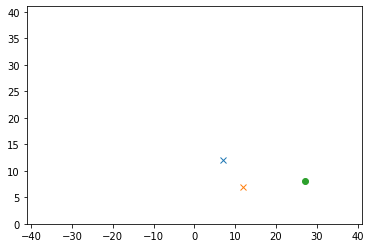

Bonne distance
Pos1 : 7/12
	Angle determiné :60
	Distance determiné :14
Pos2 : 12/21
	Angle determiné :60
	Distance determiné :24
PosS : 3/26
	Angle determiné :83
	Distance determiné :26


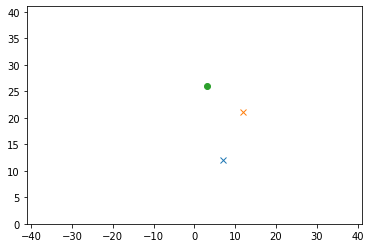

Mauvaise distance
Pos1 : 7/12
	Angle determiné :60
	Distance determiné :14
Pos2 : 0/14
	Angle determiné :90
	Distance determiné :14
PosS : 3/21
	Angle determiné :82
	Distance determiné :21


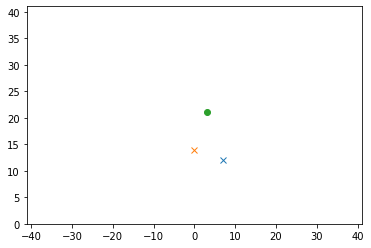

Bonne distance
Mauvaise distance
Pos1 : -7/12
	Angle determiné :60
	Distance determiné :14
Pos2 : -12/7
	Angle determiné :30
	Distance determiné :14
PosS : -32/4
	Angle determiné :7
	Distance determiné :32


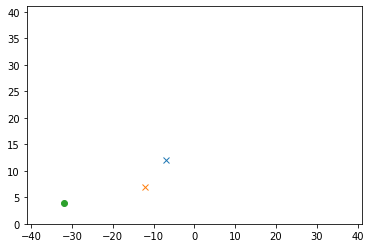

Bonne distance
Bonne distance
Bonne distance
Pos1 : 0/24
	Angle determiné :90
	Distance determiné :24
Pos2 : 0/14
	Angle determiné :90
	Distance determiné :14
PosS : -9/14
	Angle determiné :57
	Distance determiné :17


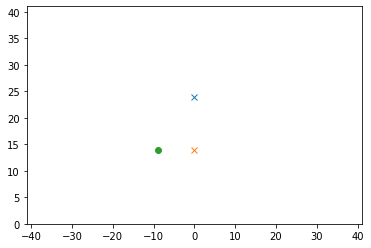

Bonne distance
Mauvaise distance
Pos1 : 12/21
	Angle determiné :60
	Distance determiné :24
Pos2 : 0/24
	Angle determiné :90
	Distance determiné :24
PosS : 13/31
	Angle determiné :67
	Distance determiné :34


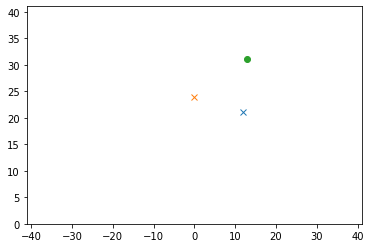

Bonne distance
Bonne distance
Mauvaise distance
Pos1 : -12/21
	Angle determiné :60
	Distance determiné :24
Pos2 : -7/12
	Angle determiné :60
	Distance determiné :14
PosS : -27/4
	Angle determiné :8
	Distance determiné :27


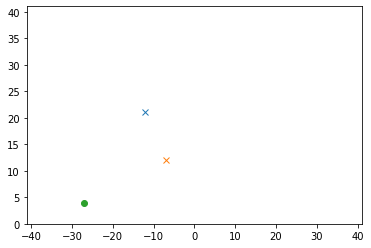

Mauvaise distance
Pos1 : 41/0
	Angle determiné :0
	Distance determiné :41
Pos2 : 36/21
	Angle determiné :30
	Distance determiné :42
PosS : 26/22
	Angle determiné :40
	Distance determiné :34


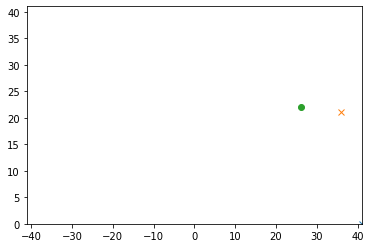

Mauvaise distance
Pos1 : 20/36
	Angle determiné :61
	Distance determiné :41
Pos2 : 0/41
	Angle determiné :90
	Distance determiné :41
PosS : 9/34
	Angle determiné :75
	Distance determiné :35


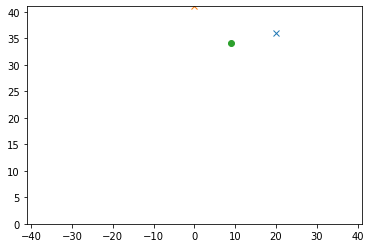

Bonne distance
Mauvaise distance
Pos1 : 4/3
	Angle determiné :37
	Distance determiné :5
Pos2 : 5/0
	Angle determiné :0
	Distance determiné :5
PosS : 6/8
	Angle determiné :53
	Distance determiné :10


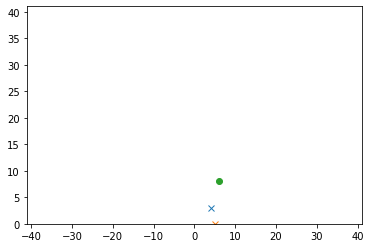

Mauvaise distance
Pos1 : -4/3
	Angle determiné :37
	Distance determiné :5
Pos2 : -7/4
	Angle determiné :30
	Distance determiné :8
PosS : -24/14
	Angle determiné :30
	Distance determiné :28


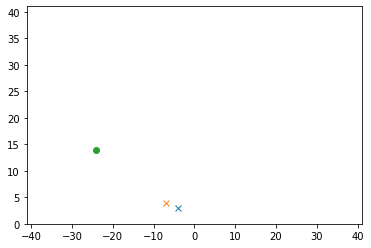

Mauvaise distance
Pos1 : 5/0
	Angle determiné :0
	Distance determiné :5
Pos2 : 4/3
	Angle determiné :37
	Distance determiné :5
PosS : 16/11
	Angle determiné :35
	Distance determiné :19


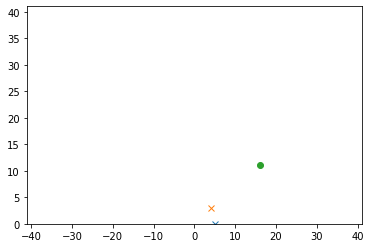

Mauvaise distance
Pos1 : 2/4
	Angle determiné :63
	Distance determiné :4
Pos2 : 4/7
	Angle determiné :60
	Distance determiné :8
PosS : 8/21
	Angle determiné :69
	Distance determiné :22


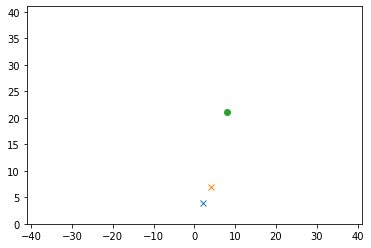

Mauvaise distance
Pos1 : 0/8
	Angle determiné :90
	Distance determiné :8
Pos2 : 4/7
	Angle determiné :60
	Distance determiné :8
PosS : 8/14
	Angle determiné :60
	Distance determiné :16


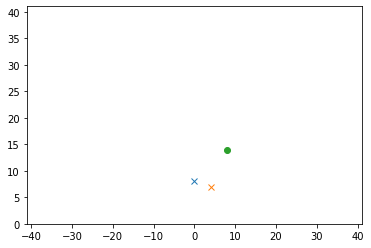

Mauvaise distance
Pos1 : 0/8
	Angle determiné :90
	Distance determiné :8
Pos2 : -4/7
	Angle determiné :60
	Distance determiné :8
PosS : -16/14
	Angle determiné :41
	Distance determiné :21


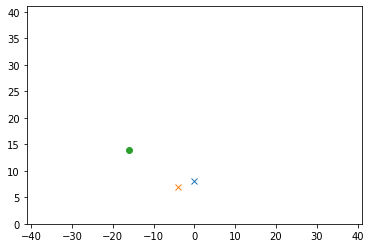

Mauvaise distance
Pos1 : 4/7
	Angle determiné :60
	Distance determiné :8
Pos2 : 7/12
	Angle determiné :60
	Distance determiné :14
PosS : 8/18
	Angle determiné :66
	Distance determiné :20


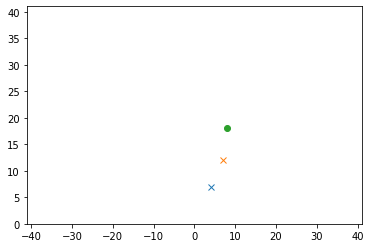

Mauvaise distance
Pos1 : -4/7
	Angle determiné :60
	Distance determiné :8
Pos2 : -2/4
	Angle determiné :63
	Distance determiné :4
PosS : -11/6
	Angle determiné :29
	Distance determiné :13


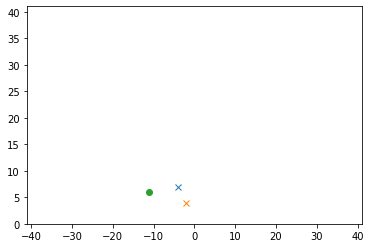

Mauvaise distance
Pos1 : -8/0
	Angle determiné :0
	Distance determiné :8
Pos2 : -7/4
	Angle determiné :30
	Distance determiné :8
PosS : -27/6
	Angle determiné :13
	Distance determiné :28


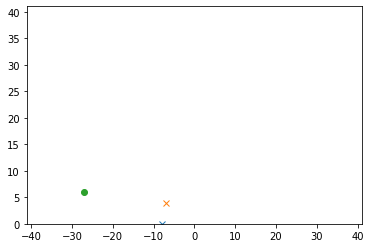

Mauvaise distance
Pos1 : -7/4
	Angle determiné :30
	Distance determiné :8
Pos2 : -4/3
	Angle determiné :37
	Distance determiné :5
PosS : -14/16
	Angle determiné :49
	Distance determiné :21


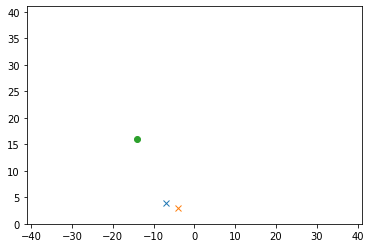

Nombre d'erreur sur la distance : 17
Nombre d'erreur sur l'angle : 7
Nombre d'essai : 26


In [24]:
verbose = False
deltaAngle = 15
deltaDistance = 2
xi = []
yi = []
xj = []
yj = []
xk = []
yk = []
for i,j,k in p:
    if(i != -1):
        xi.append(i[0])
        yi.append(i[1])
        xj.append(j[0])
        yj.append(j[1])
        xk.append(k[0])
        yk.append(k[1])
cptErreurAngle = 0
cptErreurDistance = 0
cpt = 0
for ind in range(0,len(xi)):
    cpt+=1
    pl = False
    ai,di = convertPositionEnAngleDistance(xi[ind],yi[ind])
    aj,dj = convertPositionEnAngleDistance(xj[ind],yj[ind])
    ak,dk = convertPositionEnAngleDistance(xk[ind],yk[ind])
    if((di-deltaDistance <= dk and dk <= dj+deltaDistance) or (di+deltaDistance >= dk and dk >=dj-deltaDistance)):
        print("Bonne distance")
    else:
        print("Mauvaise distance")
        cptErreurDistance+=1
        pl = True
    if((ai-deltaAngle <= ak and ak <= aj+deltaAngle) or (ai+deltaAngle >= ak and ak >= aj-deltaAngle)):
        if(verbose):
            print("Bonne Angle")
    else:
        if(verbose):
            print("Mauvais angle")
        cptErreurAngle+=1
        pl=True
    if(pl):
        print("Pos1 : "+str(xi[ind])+"/"+str(yi[ind])+"\n\tAngle determiné :"+str(ai)+"\n\tDistance determiné :"+str(di))
        print("Pos2 : "+str(xj[ind])+"/"+str(yj[ind])+"\n\tAngle determiné :"+str(aj)+"\n\tDistance determiné :"+str(dj))
        print("PosS : "+str(xk[ind])+"/"+str(yk[ind])+"\n\tAngle determiné :"+str(ak)+"\n\tDistance determiné :"+str(dk))
        plt.xlim(-41,41)
        plt.ylim(0,41)
        plt.plot(xi[ind],yi[ind],"x")
        plt.plot(xj[ind],yj[ind],"x")
        plt.plot(xk[ind],yk[ind],"o")
        plt.show()
print("Nombre d'erreur sur la distance : "+str(cptErreurDistance))
print("Nombre d'erreur sur l'angle : "+str(cptErreurAngle))
print("Nombre d'essai : "+str(cpt))

In [ ]:
print(reponses.keys())
print(reponses[0].keys())
print(reponses[0][0].keys())
print(reponses[0][0]['Eloignement'].keys())
print(reponses[0][0]['Eloignement']["Distance"])
print(reponses[0][0]['Eloignement']["Reponse"])
print(reponses[0][0]['Eloignement']["P2"])

In [ ]:
len([[0]*82]*41)

In [ ]:
ar1 = [[0 for i in range(0,84)] for j in range(0,42)]
ar2 = [[0 for i in range(0,84)] for j in range(0,42)]
er = [[0 for i in range(0,84)] for j in range(0,42)]
for dist in reponses.keys():
    for angle in reponses[dist].keys():
        for mvm in reponses[dist][angle].keys():
            p1 = reponses[dist][angle][mvm]["P1"]
            p2 = reponses[dist][angle][mvm]["P2"]
            g = reponses[dist][angle][mvm]["Reponse"]==mvm
            if(p1 != -1):
                if (g):
                    ar1[p1[1]][p1[0]+41]+=1/len(reponses[dist][angle].keys())
                else:
                    ar1[p1[1]][p1[0]+41]-=1/len(reponses[dist][angle].keys())
                    er[p1[1]][p1[0]+41]+=1
            if(p2 != -1):
                if (g):
                    ar2[p2[1]][p2[0]+41]+=1/len(reponses[dist][angle].keys())
                else:
                    ar2[p2[1]][p2[0]+41]-=1/len(reponses[dist][angle].keys())
for i in range(0,len(ar1)):
    for j in range(len(ar1[i])):
        if(ar1[i][j]<0):
            ar1[i][j]=0
        if(ar2[i][j]<0):
            ar2[i][j]=0
        if(er[i][j]<0):
            er[i][j]=0

In [ ]:
import numpy as np; np.random.seed(0)

import seaborn as sns;

ax = sns.heatmap(ar1)
ax.invert_yaxis()

In [ ]:
ax = sns.heatmap(ar2)
ax.invert_yaxis()

In [ ]:
ax = sns.heatmap(er)
ax.invert_yaxis()